## Neural Network and Machine Learning for Signal Processing Workshop for EST's internship 2018 

Author : Suradej Dunapummet

Advance Automation and Electronics Research Unit, NECTEC

Created : June 13, 2018

###  Lab 15 : Handwritten digit recognition 
Aims:

1.How to develop and evaluate a simple neural network called Multilayer Perceptron, MLP.

2.How to implement and evaluate a simple Convolutional Neural Network, CNN.
##### Import Library

In [49]:
import numpy as np
import matplotlib.pyplot as plt

### MNIST dataset
The MNIST problem is a dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classification problem.

The dataset was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). This is where the name for the dataset comes from, as the Modified NIST or MNIST dataset.

In [99]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


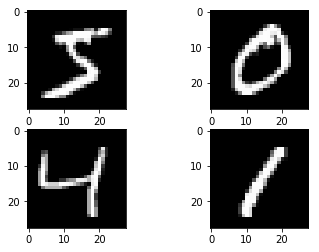

In [100]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

### reshape and normalize the input from 0-255 to 0-1

In [155]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype(np.float32).reshape((x_train.shape[0],28*28))/255.0
x_test = x_test.astype(np.float32).reshape((x_test.shape[0],28*28))/255.0

It is a digit recognition task. As such there are 10 digits (0 to 9) or 10 classes to predict. We can use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix.

In [156]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [157]:
y_train.shape

(60000, 10)

In [158]:
print("One hot vector looks like :",y_train[0])

One hot vector looks like : [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


To initialize the random number generator to a constant to ensure that the results of your script are reproducible.

In [159]:
seed = 7
np.random.seed(seed)

In [160]:
epochs = 10
batch_size = 64

# 1. Multilayer Perceptron, MLP

![title](mnistMLP.png)

ref:http://corochann.com/mnist-training-with-multi-layer-perceptron-1149.html

In [161]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Fully connected feedforward network 

Hidden node = 100

Activation function = sigmoid 

In [162]:
mlp = Sequential()
mlp.add(Dense (1000, input_dim = 784, activation = 'sigmoid'))
#mlp.add(Dense (500, input_dim = 784, activation = 'sigmoid'))
mlp.add(Dense (10, activation='sigmoid'))
mlp.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_43 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [163]:
mlp.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 24s 395us/step - loss: 0.3698 - acc: 0.8919
Epoch 2/10
60000/60000 [==============================] - 23s 376us/step - loss: 0.2065 - acc: 0.9393
Epoch 3/10
60000/60000 [==============================] - 24s 400us/step - loss: 0.1444 - acc: 0.9577
Epoch 4/10
60000/60000 [==============================] - 24s 404us/step - loss: 0.1053 - acc: 0.9687
Epoch 5/10
60000/60000 [==============================] - 24s 393us/step - loss: 0.0818 - acc: 0.9759
Epoch 6/10
60000/60000 [==============================] - 23s 376us/step - loss: 0.0627 - acc: 0.9812
Epoch 7/10
60000/60000 [==============================] - 23s 390us/step - loss: 0.0504 - acc: 0.9846
Epoch 8/10
60000/60000 [==============================] - 23s 388us/step - loss: 0.0381 - acc: 0.9885
Epoch 9/10
60000/60000 [==============================] - 24s 399us/step - loss: 0.0302 - acc: 0.9913
Epoch 10/10
60000/60000 [==============================] - 24s 404us/step - loss: 

### Evaluate Multilayer percepton 

In [165]:
score = mlp.evaluate(x_test, y_test, verbose = 0)
print("MLP Error: %.2f%%" % (100-score[0]*100))

MLP Error: 93.36%


# 2. Convolutional Neural Network, CNN

![title](mnistCNN2.png)
Ref: LeCun et al., 1998

In [167]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype(np.float32).reshape((x_train.shape[0],28,28,1))/255.0
x_test = x_test.astype(np.float32).reshape((x_test.shape[0],28,28,1))/255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [124]:
x_train.shape

(60000, 28, 28, 1)

In [121]:
from keras.layers import (Conv2D, MaxPooling2D, BatchNormalization, Activation, Flatten)

In [152]:
cnn = Sequential()
cnn.add( Conv2D (10, (3,3), padding='same', use_bias=False, data_format = 'channels_last', input_shape =(28,28,1)))
#cnn.add( BatchNormalization(axis=-1))
cnn.add( Activation('relu'))
#cnn.add( MaxPooling2D(pool_size=(2,2),data_format='channels_last'))
cnn.add(Flatten())
cnn.add( Dense(10, activation='softmax'))
cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 10)        90        
_________________________________________________________________
activation_14 (Activation)   (None, 28, 28, 10)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 7840)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 10)                78410     
Total params: 78,500
Trainable params: 78,500
Non-trainable params: 0
_________________________________________________________________


In [153]:
cnn.fit(x_train, y_train,batch_size=batch_size, epochs=epochs, shuffle=True,verbose=1)

Epoch 1/10
60000/60000 [==============================] - 19s 311us/step - loss: 0.2879 - acc: 0.9205
Epoch 2/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.1215 - acc: 0.9648
Epoch 3/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.0824 - acc: 0.9766
Epoch 4/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.0641 - acc: 0.9816
Epoch 5/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.0535 - acc: 0.98431s - loss: 0.0
Epoch 6/10
60000/60000 [==============================] - 18s 301us/step - loss: 0.0450 - acc: 0.9865
Epoch 7/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.0395 - acc: 0.98810s - loss: 0.0396 - acc: 0.
Epoch 8/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.0340 - acc: 0.9901
Epoch 9/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.0300 - acc: 0.9911
Epoch 10/10
60000/60000 [================

## Evaluate CNN model 

In [168]:
score = cnn.evaluate(x_test, y_test, verbose = 0)
print("CNN Error: %.2f%%" % (100-score[0]*100))

CNN Error: 93.09%


# 3. Larger Convolutional Neural Network


We try to add more layers and more features on each layer, for example,

Two Convolutional layers with 30 feature maps of size 5×5 and 15 feature maps of size 3×3

Fully connected layer with 128 neurons and rectifier activation.

Fully connected layer with 50 neurons and rectifier activation.

In [143]:
# load data
(x_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][pixels]
x_train = x_train.reshape(x_train.shape[0], 28, 28,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28,1).astype('float32')
# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [144]:
L_cnn = Sequential()
L_cnn.add(Conv2D(30, (5, 5), input_shape=(28, 28,1), activation='relu'))
L_cnn.add(MaxPooling2D(pool_size=(2, 2)))
L_cnn.add(Conv2D(15, (3, 3), activation='relu'))
L_cnn.add(MaxPooling2D(pool_size=(2, 2)))
L_cnn.add(Dropout(0.2))
L_cnn.add(Flatten())
L_cnn.add(Dense(128, activation='relu'))
L_cnn.add(Dense(50, activation='relu'))
L_cnn.add(Dense(num_classes, activation='softmax'))
# Compile model
L_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
L_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 375)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               48128     
__________

In [146]:
L_cnn.fit(x_train, y_train,batch_size=batch_size, epochs=epochs, shuffle=True,verbose=1)

Epoch 1/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.2429 - acc: 0.9239
Epoch 2/10
60000/60000 [==============================] - 58s 959us/step - loss: 0.0707 - acc: 0.9776
Epoch 3/10
60000/60000 [==============================] - 58s 967us/step - loss: 0.0547 - acc: 0.9828
Epoch 4/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0469 - acc: 0.9850
Epoch 5/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0391 - acc: 0.9874
Epoch 6/10
60000/60000 [==============================] - 60s 994us/step - loss: 0.0343 - acc: 0.9890
Epoch 7/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0308 - acc: 0.9899
Epoch 8/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0271 - acc: 0.9914: 1s - loss: 0.
Epoch 9/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0257 - acc: 0.9913
Epoch 10/10
60000/60000 [==============================] - 65s 1ms/step - loss:

## Evaluate Larger CNN model 

In [169]:
score = L_cnn.evaluate(x_test, y_test, verbose = 0)
print("Large CNN Error: %.2f%%" % (100-score[0]*100))

Large CNN Error: 97.49%
